In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr

In [2]:
# load the data
final_df= pd.read_csv(Path('./Resources/joined_df.csv'))
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers
0,Alabama,4874486,241,530018,0.000049,293556,236498,91653
1,Alaska,739700,28,44862,0.000038,23045,13385,6984
2,Arizona,7044008,494,501839,0.000070,267683,227196,74093
3,Arkansas,3001345,235,299417,0.000078,180694,146161,63780
4,California,39358497,1761,2593251,0.000045,1403613,988700,339093


In [3]:
# calculate per capita rates for obesity, inactivity, and smokers
final_df['obesity_per_capita'] = final_df['number_of_obesity_cases']/final_df['state_population']
final_df['inactivity_per_capita'] = final_df['number_of_inactive_adults']/final_df['state_population']
final_df['smokers_per_capita'] = final_df['number_of_smokers']/final_df['state_population']
final_df['diabetes_per_capita'] = final_df['number_of_diabetes_cases']/final_df['state_population']
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers,obesity_per_capita,inactivity_per_capita,smokers_per_capita,diabetes_per_capita
0,Alabama,4874486,241,530018,0.000049,293556,236498,91653,0.060223,0.048518,0.018803,0.108733
1,Alaska,739700,28,44862,0.000038,23045,13385,6984,0.031155,0.018095,0.009442,0.060649
2,Arizona,7044008,494,501839,0.000070,267683,227196,74093,0.038002,0.032254,0.010519,0.071243
3,Arkansas,3001345,235,299417,0.000078,180694,146161,63780,0.060204,0.048699,0.021250,0.099761
4,California,39358497,1761,2593251,0.000045,1403613,988700,339093,0.035662,0.025120,0.008615,0.065888


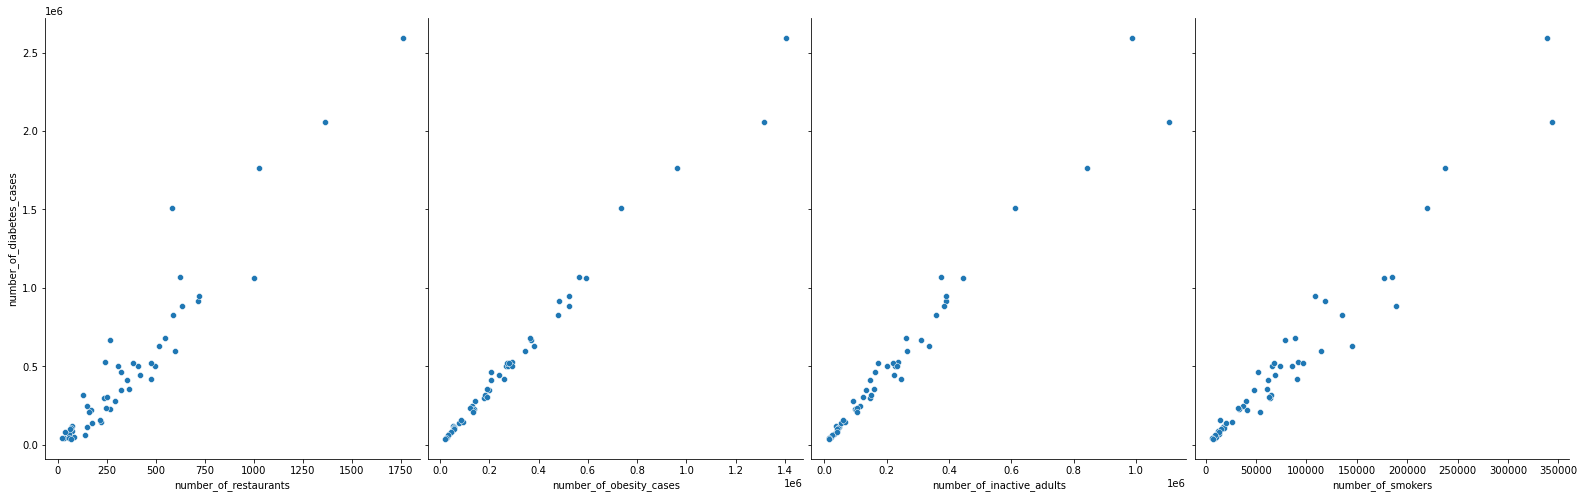

In [4]:
# visualize the relationship between the numbers of the variables (not per capita)
sns.pairplot(final_df, x_vars=['number_of_restaurants', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers'],
             y_vars='number_of_diabetes_cases', height=7, aspect=0.8)

In [5]:
# convert to csv
final_df.to_csv(r'Resources/per_capita_df.csv', index=False)

In [6]:
# drop columns with raw values
final_df= final_df.drop(['state_population', 'number_of_restaurants', 'number_of_diabetes_cases', 'number_of_inactive_adults', 'number_of_obesity_cases', 'number_of_smokers'], axis = 1)
final_df.head()

,state_name,restaurants_per_capita,obesity_per_capita,inactivity_per_capita,smokers_per_capita,diabetes_per_capita
0,Alabama,0.000049,0.060223,0.048518,0.018803,0.108733
1,Alaska,0.000038,0.031155,0.018095,0.009442,0.060649
2,Arizona,0.000070,0.038002,0.032254,0.010519,0.071243
3,Arkansas,0.000078,0.060204,0.048699,0.021250,0.099761
4,California,0.000045,0.035662,0.025120,0.008615,0.065888


In [7]:
# Create heatmap from per capita data
final_df.style.background_gradient()

,state_name,restaurants_per_capita,obesity_per_capita,inactivity_per_capita,smokers_per_capita,diabetes_per_capita
0,Alabama,0.000049,0.060223,0.048518,0.018803,0.108733
1,Alaska,0.000038,0.031155,0.018095,0.009442,0.060649
2,Arizona,0.000070,0.038002,0.032254,0.010519,0.071243
3,Arkansas,0.000078,0.060204,0.048699,0.021250,0.099761
4,California,0.000045,0.035662,0.025120,0.008615,0.065888
5,Colorado,0.000052,0.025702,0.016678,0.007081,0.049699
6,Connecticut,0.000041,0.036108,0.031674,0.010218,0.069730
7,Delaware,0.000073,0.052214,0.040915,0.012683,0.089363
8,District of Columbia,0.000030,0.035454,0.027526,0.013308,0.063824
9,Florida,0.000049,0.045784,0.040219,0.011343,0.084060


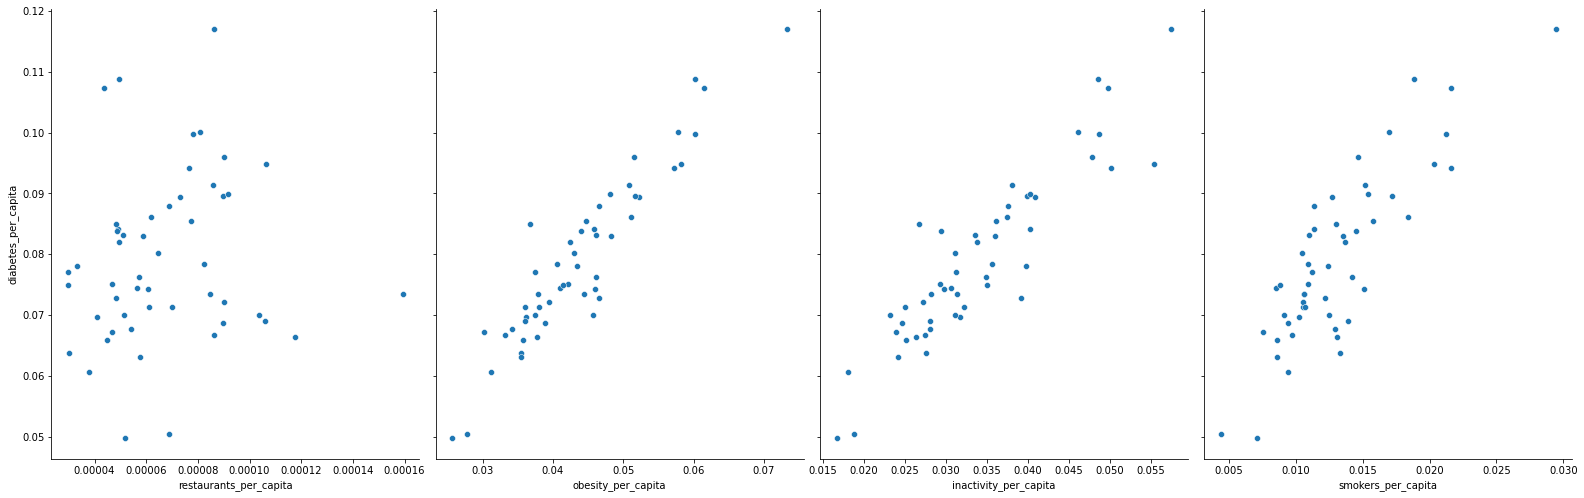

In [8]:
# visualize the relationship between the features and number of diabetes cases using scatterplots
sns.pairplot(final_df, x_vars=['restaurants_per_capita', 'obesity_per_capita', 'inactivity_per_capita', 'smokers_per_capita'],
             y_vars='diabetes_per_capita', height=7, aspect=0.8)

In [9]:
#define the variables
features=['restaurants_per_capita', 'obesity_per_capita', 
          'inactivity_per_capita', 'smokers_per_capita']
X = final_df[features].values.reshape(-1, len(features))
y = final_df['diabetes_per_capita'].values

# split data using 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# instantiate and fit
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [10]:
# pair the feature names with the coefficients
list(zip(features, model.coef_))

[('restaurants_per_capita', -16.274601886848252),
 ('obesity_per_capita', 0.9263956184949789),
 ('inactivity_per_capita', 0.37704993236201967),
 ('smokers_per_capita', 0.2303912532966994)]

In [11]:
# calculate intercept
model.intercept_

0.02404193546962305

In [12]:
# evaluate the multiple Linear Regression model
mean_square = mean_squared_error(y_test, y_pred)
R_squared= model.score(X, y)
pearson = pearsonr(y_test, y_pred)

print(f'Linear Regression mean square error is: {mean_square}')
print(f'Linear Regression R squared is: {R_squared}')
print(f'Linear Regression pearson coefficient is: {pearson}')

Linear Regression mean square error is: 9.501711071642502e-06
Linear Regression R squared is: 0.8891662637660523
Linear Regression pearson coefficient is: (0.9709414518591231, 6.82305350681304e-07)


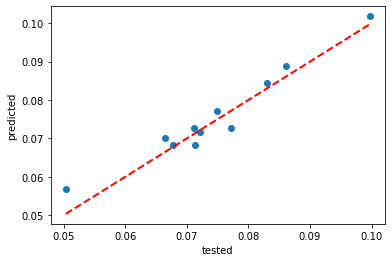

In [13]:
#Plot linear regression y_test and y_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('tested')
ax.set_ylabel('predicted')
plt.show()

In [14]:
# instantiate and fit 
rf_model = RandomForestRegressor(n_estimators=128) 
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [15]:
# evaluate the Random Forest Regression model
rf_mean_square = mean_squared_error(y_test, predictions)
rf_R_squared= rf_model.score(X, y)
rf_pearson = pearsonr(y_test, predictions)

print(f'Random Forest mean square error is: {rf_mean_square}')
print(f'Random Forest R squared is: {rf_R_squared}')
print(f'Random Forest pearson coefficient is: {rf_pearson}')

Random Forest mean square error is: 1.9709142410296945e-05
Random Forest R squared is: 0.9527754774044557
Random Forest pearson coefficient is: (0.9636344982704097, 1.8524624097460867e-06)


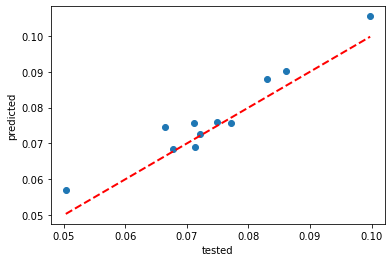

In [16]:
#Plot Random Forest Regression y_test and y_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('tested')
ax.set_ylabel('predicted')
plt.show()

In [17]:
#redefine the variables to confirm restaurant per capita is not correlated to diabetes
X2 = final_df['restaurants_per_capita'].values.reshape(-1, 1)
y2 = final_df['diabetes_per_capita'].values

# split data using 80/20 ratio
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1, test_size=0.2)

# instantiate and fit
model = LinearRegression()
model.fit(X2_train, y2_train)

# predict
y2_pred = model.predict(X2_test)

In [18]:
# evaluate the Linear Regression model with only restaurant data
mean_square2 = mean_squared_error(y2_test, y2_pred)
R_squared2= model.score(X2, y2)
pearson2 = pearsonr(y2_test, y2_pred)

print(f'Linear Regression mean square error is: {mean_square2}')
print(f'Linear Regression R squared is: {R_squared2}')
print(f'Linear Regression pearson coefficient is: {pearson2}')

Linear Regression mean square error is: 0.00018518260603333042
Linear Regression R squared is: 0.007241588114186404
Linear Regression pearson coefficient is: (-0.11802692440597003, 0.7296281036952373)


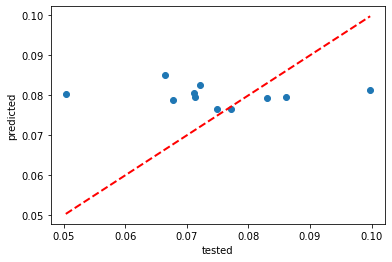

In [19]:
#Plot linear regression y2_test and y2_predict (restaurant per capita)
fig, ax = plt.subplots()
ax.scatter(y2_test, y2_pred)
ax.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
ax.set_xlabel('tested')
ax.set_ylabel('predicted')
plt.show()